### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [2]:
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# importa el tsv y guárdalo en un dataframe

In [3]:
df = pd.read_csv("data/drugLibTrain_raw.tsv",sep="\t",index_col=0)
df

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...
1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3107 entries, 2202 to 2748
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   urlDrugName        3107 non-null   object
 1   rating             3107 non-null   int64 
 2   effectiveness      3107 non-null   object
 3   sideEffects        3107 non-null   object
 4   condition          3106 non-null   object
 5   benefitsReview     3089 non-null   object
 6   sideEffectsReview  3032 non-null   object
 7   commentsReview     3095 non-null   object
dtypes: int64(1), object(7)
memory usage: 218.5+ KB


In [5]:
df.describe(include='all')

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
count,3107,3107.000000,3107,3107,3106,3089,3032,3095
unique,502,NaN,5,5,1426,3031,2813,3046
top,lexapro,NaN,Highly Effective,Mild Side Effects,depression,none,none,none
freq,63,NaN,1330,1019,236,20,112,6
mean,NaN,7.006115,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.937582,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN


#### Transforma las columnas categoricas

Transforma las columnas categoricas a numericas mediante dummies

,effectiveness_Considerably Effective,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective,sideEffects_Extremely Severe Side Effects,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects
2202,0,1,0,0,0,0,1,0,0,0
3117,0,1,0,0,0,0,0,0,0,1
1146,0,1,0,0,0,0,0,0,1,0
3947,0,0,0,1,0,0,1,0,0,0
1951,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1039,0,1,0,0,0,0,1,0,0,0
3281,0,0,1,0,0,1,0,0,0,0
1664,0,0,0,1,0,0,0,1,0,0
2621,1,0,0,0,0,0,1,0,0,0


In [7]:
df2 = pd.get_dummies(df,columns=["sideEffects","effectiveness"])
df2

,urlDrugName,rating,condition,benefitsReview,sideEffectsReview,commentsReview,sideEffects_Extremely Severe Side Effects,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects,effectiveness_Considerably Effective,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective
2202,enalapril,4,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",False,True,False,False,False,False,True,False,False,False
3117,ortho-tri-cyclen,1,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",False,False,False,False,True,False,True,False,False,False
1146,ponstel,10,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,False,False,False,True,False,False,True,False,False,False
3947,prilosec,3,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,False,True,False,False,False,False,False,False,True,False
1951,lyrica,2,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,vyvanse,10,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m...",False,True,False,False,False,False,True,False,False,False
3281,zoloft,1,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...,True,False,False,False,False,False,False,True,False,False
1664,climara,2,total hysterctomy,---,Constant issues with the patch not staying on....,---,False,False,True,False,False,False,False,False,True,False
2621,trileptal,8,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...,False,True,False,False,False,True,False,False,False,False


In [ ]:
# comprueba los valores únicos de 'effectiveness'

In [ ]:
df["effectiveness"].value_counts() 

effectiveness
Highly Effective          1330
Considerably Effective     928
Moderately Effective       415
Ineffective                247
Marginally Effective       187
Name: count, dtype: int64

In [ ]:
# Creamos un diccionario para transformar esas strings en int

In [8]:
my_dict = {"Ineffective":0,
            "Marginally Effective":1,
            "Moderately Effective":2,
            "Considerably Effective":3,
            "Highly Effective":4} # aparte de hacer labelencoding lo estamos organizando de mayor a menor gravedad

In [9]:
df['effectiveness_int'] = df['effectiveness'].map(my_dict)

In [10]:
df

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_int
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",4
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",4
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,4
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,1
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,1
...,...,...,...,...,...,...,...,...,...
1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m...",4
3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...,0
1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---,1
2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...,3


In [ ]:
# comprueba los valores únicos de 'sideEffects'

In [10]:
df["sideEffects"].value_counts()

sideEffects
Mild Side Effects                1019
No Side Effects                   930
Moderate Side Effects             614
Severe Side Effects               369
Extremely Severe Side Effects     175
Name: count, dtype: int64

In [11]:
# crea el diccionario para sideeffects_int, como antes

In [11]:
my_dict2 = {"No Side Effects":0,
            "Mild Side Effects":1,
            "Moderate Side Effects":2,
            "Severe Side Effects":3,
            "Extremely Severe Side Effects":4}

df['sideEffects_int'] = df['sideEffects'].map(my_dict2)

In [12]:
# guarda en una variable df_model con solo las columnas 'rating','effectiveness_int','sideEffects_int'

df_model = df[["rating","effectiveness_int","sideEffects_int"]]

In [13]:
df_model

,rating,effectiveness_int,sideEffects_int
2202,4,4,1
3117,1,4,3
1146,10,4,0
3947,3,1,1
1951,2,1,3
...,...,...,...
1039,10,4,1
3281,1,0,4
1664,2,1,2
2621,8,3,1


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K. Evalua como mucho K = 20

#### Genera el K Means 

In [ ]:
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans


In [ ]:
# entrena y guarda modelos para k con valores entre 1 y 20 mediante un list comprehension usando un random_state=42
# O bueno un bucle, haz lo que te guste

In [26]:
from sklearn.cluster import KMeans


kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_model)
                for k in range(1, 10)]

Exception in thread Thread-35 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\Usuario\miniconda3\envs\data_analysis_env\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "c:\Users\Usuario\miniconda3\envs\data_analysis_env\Lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "c:\Users\Usuario\miniconda3\envs\data_analysis_env\Lib\threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\Usuario\miniconda3\envs\data_analysis_env\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 108: invalid start byte


In [ ]:
# muestra la lista con los modelos entrenados
# El ocho es el valor por defecto por eso no aparece cuando lo ejecutas

In [27]:
kmeans_per_k

[KMeans(n_clusters=1, random_state=42),
 KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42),
 KMeans(n_clusters=9, random_state=42)]

In [ ]:
# guarda los silhouette scores del modelo con list comprehension

In [28]:

silhouette_scores = [
    silhouette_score(df_model, model.labels_)
    for model in kmeans_per_k[1:]
]

NameError: name 'silhouette_score' is not defined

In [ ]:
# comprueba la longitud de los silhouette scores

In [20]:
len(silhouette_scores)

NameError: name 'silhouette_scores' is not defined

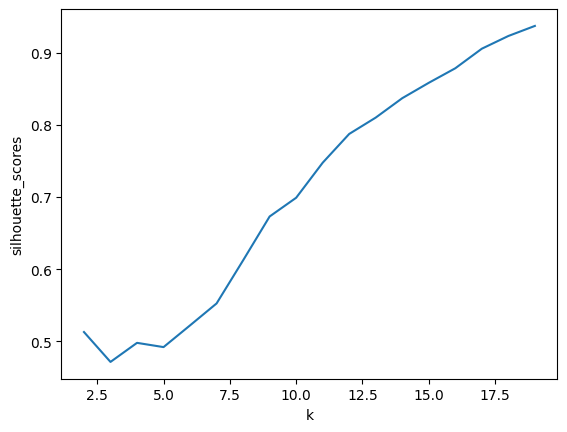

In [22]:
plt.plot(range(2,20), silhouette_scores)
plt.xlabel('k')
plt.ylabel('silhouette_scores')
plt.show()

Mayor silhouette scores con K=2

In [26]:
# guarda las inercias del model con un list comprehension
inertias = [model.inertia_ for model in kmeans_per_k] 

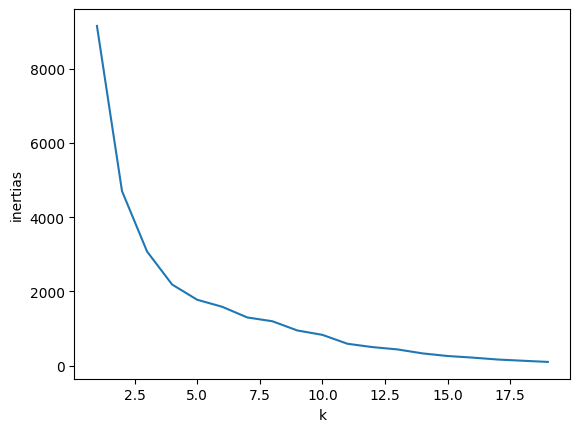

In [27]:
plt.plot(range(1,20), inertias)
plt.xlabel('k')
plt.ylabel('inertias')
plt.show()

Con el Elbow method comprobamos que k=2 sería la opción más adecuada

In [28]:
# instancia un nuevo KMeans con n_clusters=2 y random_state=42

# entrena el modelo

# comprueba los labels_


k = 2 # número de grupos

kmeans = KMeans(n_clusters=k, random_state=42)

kmeans.fit(X)

kmeans.labels_

array([0, 0, 0, ..., 1, 0, 1], shape=(3107,), dtype=int32)

array([0, 0, 1, ..., 0, 1, 0])

#### Muestra en un gráfico de tartas la distribución de los distintos clusters

In [ ]:
# crea un dataframe .labels_ del modelo anterior

,Cluster
0,0
1,0
2,1
3,0
4,0


In [ ]:
# El favorito de Joselu

<AxesSubplot:ylabel='Cluster'>

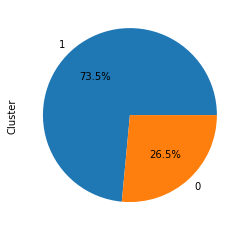

In [49]:
df_clusters['Cluster'].value_counts().plot.pie(autopct="%.1f%%")